In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank = pd.read_csv("bank_authentication.csv")
print(bank.head())

   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [3]:
X = bank.iloc[:,0:4]
y = bank.iloc[:,4]
X
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [6]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators = 30,random_state = 1)
cl.fit(X_train,y_train)
y_pred = cl.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9890909090909091
[[155   1]
 [  2 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.99      0.98      0.99       119

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [15]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.metrics import accuracy_score
from pydotplus import graph_from_dot_data
import os

C:\Users\saisr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


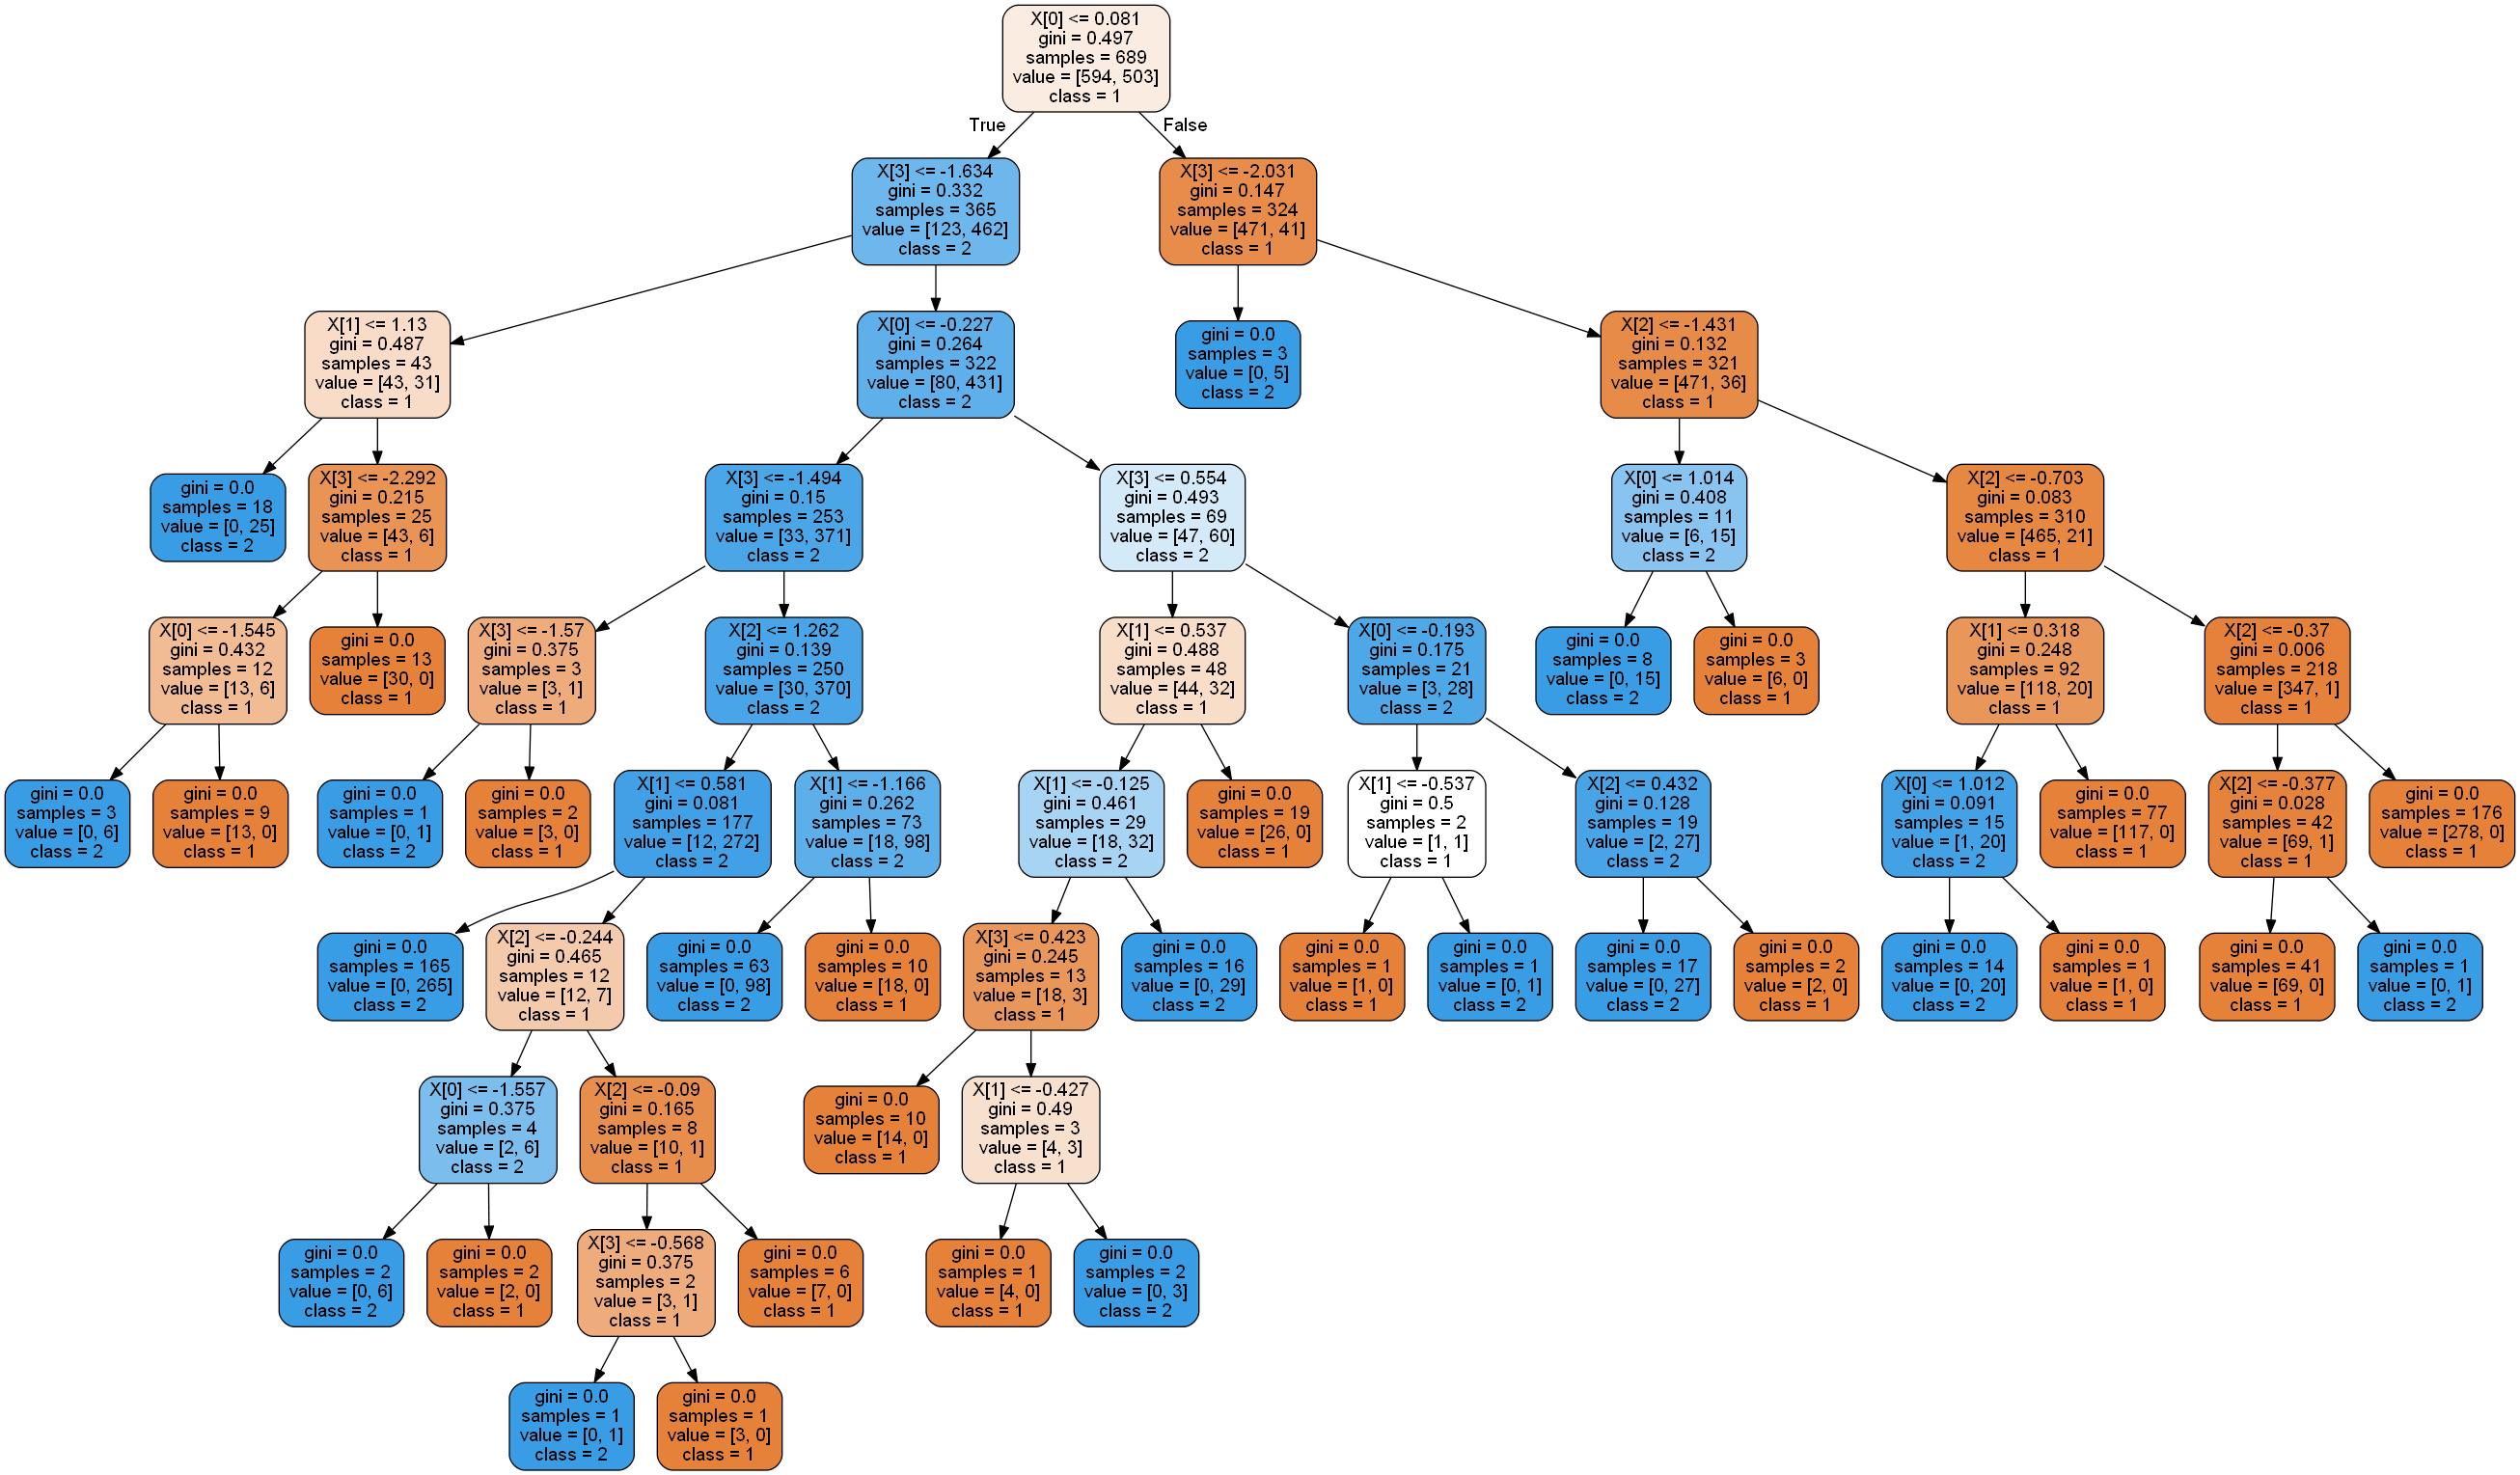

In [16]:
import os
os.environ["PATH"]+= os.environ["PATH"]+';'+r'C:\ProgramData\Anaconda3\Library\bin\graphviz2.38\bin'
from IPython.display import Image
dot_data = StringIO()
export_graphviz(cl.estimators_[1],out_file = dot_data,filled = True ,rounded = True,class_names = ['1','2'])
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [17]:
graph.write_png("Rtree.png")

True

In [18]:
graph.write_pdf("Rtree.pdf")

True

In [19]:
cl.predict([[-2.2173,1.4671,-0.72689,-1.1724]])

array([1], dtype=int64)